# Assignment 2: Linear Regression

<mark> Ethan Wen - 2/06/2022 - Professor Mishra </mark>

From Kaggle, we will be using the same dataset that we used in **Assignment 1: Feature Engineering**. We will be using linear regression to predict SalesPrice from a set of features. 

We can find the dataset located here (training split of the original dataset): [Click Here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv)

We can find the descriptions of the columns right [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt)

The training dataset and the descriptions of the column are named train.csv and data_description.txt respectively. 

***Changes from Assignment 1**, LotShape is considered a categorical nominal variable since its hard to predict whether the features of being regular or irregular can affect the sales price. 

For the assignment, we will be using the following features: LotShape, LotConfig, Neighborhood, OverallQual, OverallCond, YearRemodAdd, GrLivArea, and MoSold. 

The label column will be SalesPrice - we will be predicting this. We already have the original feature - SalePrice - the actual sale price of the houses. 

### 1. Feature Engineering (*I will be transferring the code used in Assignment 1 for the first part.)

In [1]:
import pandas as pd
house_predict_df = pd.read_csv("train.csv")

In [2]:
print(house_predict_df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [3]:
house_predict_df.duplicated().sum()

0

In [4]:
temp = house_predict_df[["LotShape","LotConfig","Neighborhood","OverallQual", "OverallCond", "YearRemodAdd", "GrLivArea", "MoSold", "SalePrice"]] 

In [5]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotShape      1460 non-null   object
 1   LotConfig     1460 non-null   object
 2   Neighborhood  1460 non-null   object
 3   OverallQual   1460 non-null   int64 
 4   OverallCond   1460 non-null   int64 
 5   YearRemodAdd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   MoSold        1460 non-null   int64 
 8   SalePrice     1460 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 102.8+ KB


In [6]:
temp = temp.dropna()
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotShape      1460 non-null   object
 1   LotConfig     1460 non-null   object
 2   Neighborhood  1460 non-null   object
 3   OverallQual   1460 non-null   int64 
 4   OverallCond   1460 non-null   int64 
 5   YearRemodAdd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   MoSold        1460 non-null   int64 
 8   SalePrice     1460 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 102.8+ KB


In [7]:
sales_price_df = temp.pop('SalePrice')
sales_price_df.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [8]:
housing_features_df = temp
housing_features_df = housing_features_df.dropna()
housing_features_df.head()

,LotShape,LotConfig,Neighborhood,OverallQual,OverallCond,YearRemodAdd,GrLivArea,MoSold
0,Reg,Inside,CollgCr,7,5,2003,1710,2
1,Reg,FR2,Veenker,6,8,1976,1262,5
2,IR1,Inside,CollgCr,7,5,2002,1786,9
3,IR1,Corner,Crawfor,7,5,1970,1717,2
4,IR1,FR2,NoRidge,8,5,2000,2198,12


From the first assignment, we found out that LotShape, LotConfig, and Neighborhood are features that are **categorical nominal** since they don't see to have any order or hierarchy. OverallQual, OverallCond, and MoSold are all features that are **categorical ordinal** since they seem to be related in a hierarchial way. YearRemodAdd and GrLivArea are both features that are **numerical values**.  

In [9]:
lot_config_list = housing_features_df["LotConfig"].to_list()
print(lot_config_list)

['Inside', 'FR2', 'Inside', 'Corner', 'FR2', 'Inside', 'Inside', 'Corner', 'Inside', 'Corner', 'Inside', 'Inside', 'Inside', 'Inside', 'Corner', 'Corner', 'CulDSac', 'Inside', 'Inside', 'Inside', 'Corner', 'Inside', 'Inside', 'Inside', 'Inside', 'Corner', 'Corner', 'Inside', 'CulDSac', 'Inside', 'Inside', 'CulDSac', 'Corner', 'Inside', 'Inside', 'Inside', 'Corner', 'Inside', 'Inside', 'Inside', 'Inside', 'Inside', 'CulDSac', 'CulDSac', 'Inside', 'Inside', 'CulDSac', 'Inside', 'Inside', 'Inside', 'Corner', 'Inside', 'Corner', 'Inside', 'Inside', 'Inside', 'Inside', 'Corner', 'CulDSac', 'Inside', 'Inside', 'Inside', 'Inside', 'Inside', 'Inside', 'Inside', 'Inside', 'Inside', 'Corner', 'Corner', 'Inside', 'Corner', 'Corner', 'Inside', 'Corner', 'Inside', 'Inside', 'Inside', 'Inside', 'Corner', 'Corner', 'FR2', 'Inside', 'Inside', 'Inside', 'Corner', 'Inside', 'Corner', 'Corner', 'Inside', 'Inside', 'Inside', 'Inside', 'Corner', 'Inside', 'Corner', 'Inside', 'Inside', 'Corner', 'Inside', '

In [10]:
lot_config_list_of_lists = []

for i in lot_config_list: 
    lot_config_list_of_lists.append([i])

print(lot_config_list_of_lists[:5])

[['Inside'], ['FR2'], ['Inside'], ['Corner'], ['FR2']]


In [11]:
from sklearn.preprocessing import OneHotEncoder

lot_config_encoder = OneHotEncoder()

lot_config_encoder.fit(lot_config_list_of_lists)

print(f"Unique vocabulary items {len(lot_config_encoder.categories_[0])}\n")

lot_config_transformed = lot_config_encoder.transform(lot_config_list_of_lists)

lot_config_transformed = lot_config_transformed.toarray()

print(lot_config_transformed)

Unique vocabulary items 5

[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [12]:
housing_features_df["LotConfig"].head()

0    Inside
1       FR2
2    Inside
3    Corner
4       FR2
Name: LotConfig, dtype: object

In [13]:
lot_config_transformed_df = pd.DataFrame(lot_config_transformed)
lot_config_transformed_df.head()

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [14]:
column_names = list(lot_config_transformed_df.columns.values)
print(column_names)

[0, 1, 2, 3, 4]


In [15]:
lot_config_transformed_df.rename(columns = {0:'Corner', 1:'CulDSac', 2:'FR2', 3:'FR3', 4: 'Inside'}, inplace = True)

In [16]:
lot_config_transformed_df.head()

,Corner,CulDSac,FR2,FR3,Inside
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [17]:
print(lot_config_transformed_df.shape)
print(housing_features_df.shape)

(1460, 5)
(1460, 8)


In [18]:
housing_features_df.reset_index(drop=True, inplace=True)
lot_config_transformed_df.reset_index(drop=True, inplace=True)

housing_features_transformed_df = pd.concat([housing_features_df, lot_config_transformed_df], axis=1)
housing_features_transformed_df.shape

(1460, 13)

In [19]:
housing_features_transformed_df.head()

,LotShape,LotConfig,Neighborhood,OverallQual,OverallCond,YearRemodAdd,GrLivArea,MoSold,Corner,CulDSac,FR2,FR3,Inside
0,Reg,Inside,CollgCr,7,5,2003,1710,2,0.0,0.0,0.0,0.0,1.0
1,Reg,FR2,Veenker,6,8,1976,1262,5,0.0,0.0,1.0,0.0,0.0
2,IR1,Inside,CollgCr,7,5,2002,1786,9,0.0,0.0,0.0,0.0,1.0
3,IR1,Corner,Crawfor,7,5,1970,1717,2,1.0,0.0,0.0,0.0,0.0
4,IR1,FR2,NoRidge,8,5,2000,2198,12,0.0,0.0,1.0,0.0,0.0


In [20]:
housing_features_transformed_df.pop('LotConfig')

0       Inside
1          FR2
2       Inside
3       Corner
4          FR2
         ...  
1455    Inside
1456    Inside
1457    Inside
1458    Inside
1459    Inside
Name: LotConfig, Length: 1460, dtype: object

In [21]:
housing_features_df["Neighborhood"].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [22]:
neighborhood_list = housing_features_df["Neighborhood"].to_list()
print(neighborhood_list)

['CollgCr', 'Veenker', 'CollgCr', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'Sawyer', 'CollgCr', 'NAmes', 'BrkSide', 'NAmes', 'Sawyer', 'SawyerW', 'NAmes', 'NridgHt', 'IDOTRR', 'CollgCr', 'MeadowV', 'Sawyer', 'NridgHt', 'NAmes', 'NridgHt', 'NAmes', 'BrkSide', 'IDOTRR', 'Sawyer', 'CollgCr', 'NAmes', 'NridgHt', 'NridgHt', 'CollgCr', 'NAmes', 'NAmes', 'Edwards', 'NAmes', 'Timber', 'SawyerW', 'CollgCr', 'NAmes', 'NridgHt', 'Mitchel', 'Somerst', 'OldTown', 'Sawyer', 'Gilbert', 'BrkSide', 'IDOTRR', 'Veenker', 'NAmes', 'NAmes', 'Somerst', 'CollgCr', 'StoneBr', 'CollgCr', 'SawyerW', 'IDOTRR', 'NridgHt', 'OldTown', 'CollgCr', 'NridgHt', 'NAmes', 'CollgCr', 'OldTown', 'ClearCr', 'NAmes', 'Mitchel', 'Gilbert', 'NAmes', 'OldTown', 'MeadowV', 'NAmes', 'BrkSide', 'Sawyer', 'OldTown', 'NAmes', 'Mitchel', 'Somerst', 'NAmes', 'Gilbert', 'NoRidge', 'Gilbert', 'Somerst', 'IDOTRR', 'CollgCr', 'NAmes', 'NAmes', 'Crawfor', 'OldTown', 'CollgCr', 'Gilbert

In [23]:
neighborhood_list_of_lists = []

for i in neighborhood_list: 
    neighborhood_list_of_lists.append([i])

print(neighborhood_list_of_lists[:5])

[['CollgCr'], ['Veenker'], ['CollgCr'], ['Crawfor'], ['NoRidge']]


In [24]:
neighborhood_encoder = OneHotEncoder()

neighborhood_encoder.fit(neighborhood_list_of_lists)

print(f"Unique vocabulary items {len(neighborhood_encoder.categories_[0])}\n")

neighborhood_transformed = neighborhood_encoder.transform(neighborhood_list_of_lists)

neighborhood_transformed = neighborhood_transformed.toarray()

print(neighborhood_transformed)

Unique vocabulary items 25

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
neighborhood_transformed_df = pd.DataFrame(neighborhood_transformed)
neighborhood_transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
temp_list = []
for i in range(len(neighborhood_transformed_df.columns)):
    temp = list(neighborhood_transformed_df[i])
    temp_list.append(temp.index(1.0))

In [27]:
housing_features_df["Neighborhood"].head()

0    CollgCr
1    Veenker
2    CollgCr
3    Crawfor
4    NoRidge
Name: Neighborhood, dtype: object

In [28]:
neighborhood_name_list = []
for i in temp_list:
    neighborhood_name_list.append(housing_features_df["Neighborhood"][i])
print(neighborhood_name_list)

['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']


In [29]:
neighborhood_transformed_df.columns = neighborhood_name_list

In [30]:
neighborhood_transformed_df.head()

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
print(neighborhood_transformed_df.shape)
print(housing_features_transformed_df.shape)

(1460, 25)
(1460, 12)


In [32]:
housing_features_transformed_df.reset_index(drop=True, inplace=True)
neighborhood_transformed_df.reset_index(drop=True, inplace=True)

housing_features_final_df = pd.concat([housing_features_transformed_df, neighborhood_transformed_df], axis=1)
housing_features_final_df.shape

(1460, 37)

In [33]:
housing_features_final_df.pop("Neighborhood")

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

In [34]:
housing_features_final_df.head()

,LotShape,OverallQual,OverallCond,YearRemodAdd,GrLivArea,MoSold,Corner,CulDSac,FR2,FR3,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,Reg,7,5,2003,1710,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Reg,6,8,1976,1262,5,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,IR1,7,5,2002,1786,9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IR1,7,5,1970,1717,2,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,IR1,8,5,2000,2198,12,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**a. The following code is used to transform LotShape into one-hot encoding features which is something that I didn't do before.**

In [35]:
housing_features_df["LotShape"].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [36]:
shape_list = housing_features_df["LotShape"].to_list()
print(shape_list)

['Reg', 'Reg', 'IR1', 'IR1', 'IR1', 'IR1', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'IR2', 'IR1', 'IR1', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'IR1', 'Reg', 'IR1', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'IR1', 'IR1', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR2', 'Reg', 'IR2', 'IR1', 'Reg', 'IR1', 'Reg', 'IR1', 'IR2', 'Reg', 'Reg', 'Reg', 'IR1', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'IR1', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'IR1', 'IR1', 'Reg', 'IR2', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'IR1', 'IR2', 'IR1', 'Reg', 'Reg', 'IR1', 'IR1', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'IR1', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'IR1', 'IR1', 'Reg', 'Reg', 'Reg', 'IR1', 'Reg', 'IR1', 'IR1', 'Reg', 'IR1', 'Reg', 'IR1', 'IR1', 'Reg', 'Reg', 'Reg'

In [37]:
shape_list_of_lists = []

for i in shape_list: 
    shape_list_of_lists.append([i])

print(shape_list_of_lists[:5])

[['Reg'], ['Reg'], ['IR1'], ['IR1'], ['IR1']]


In [38]:
shape_encoder = OneHotEncoder()

shape_encoder.fit(shape_list_of_lists)

print(f"Unique vocabulary items {len(shape_encoder.categories_[0])}\n")

shape_transformed = shape_encoder.transform(shape_list_of_lists)

shape_transformed = shape_transformed.toarray()

print(shape_transformed)

Unique vocabulary items 4

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [39]:
shape_transformed_df = pd.DataFrame(shape_transformed)
shape_transformed_df.head()

,0,1,2,3
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [41]:
housing_features_df["LotShape"].head()

0    Reg
1    Reg
2    IR1
3    IR1
4    IR1
Name: LotShape, dtype: object

From this we know that '0' corresponds to **IR1** and '3' corresponds to **Reg**. 

In [43]:
temp = list(shape_transformed_df[1])
temp.index(1.0)

12

In [44]:
housing_features_df["LotShape"][12:13]

12    IR2
Name: LotShape, dtype: object

From this we now know that '1' corresponds to **IR2** and '2' corresponds to **IR3**. 

In [45]:
shape_transformed_df.rename(columns = {0:'IR1', 1:' IR2', 2:'IR3', 3:'Reg'}, inplace = True)

In [46]:
shape_transformed_df.head()

,IR1,IR2,IR3,Reg
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [48]:
print(shape_transformed_df.shape)
print(housing_features_final_df.shape)

(1460, 4)
(1460, 36)


In [49]:
housing_features_final_df.reset_index(drop=True, inplace=True)
shape_transformed_df.reset_index(drop=True, inplace=True)

features_official_df = pd.concat([housing_features_final_df, shape_transformed_df], axis=1)
features_official_df.shape

(1460, 40)

In [50]:
features_official_df.head()

,LotShape,OverallQual,OverallCond,YearRemodAdd,GrLivArea,MoSold,Corner,CulDSac,FR2,FR3,...,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,IR1,IR2,IR3,Reg
0,Reg,7,5,2003,1710,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Reg,6,8,1976,1262,5,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,IR1,7,5,2002,1786,9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,IR1,7,5,1970,1717,2,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,IR1,8,5,2000,2198,12,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [51]:
features_official_df.pop('LotShape')

0       Reg
1       Reg
2       IR1
3       IR1
4       IR1
       ... 
1455    Reg
1456    Reg
1457    Reg
1458    Reg
1459    Reg
Name: LotShape, Length: 1460, dtype: object

In [52]:
features_official_df.head()

,OverallQual,OverallCond,YearRemodAdd,GrLivArea,MoSold,Corner,CulDSac,FR2,FR3,Inside,...,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,IR1,IR2,IR3,Reg
0,7,5,2003,1710,2,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6,8,1976,1262,5,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,7,5,2002,1786,9,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,7,5,1970,1717,2,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8,5,2000,2198,12,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_official_df[["YearRemodAdd", "GrLivArea"]] = scaler.fit_transform(features_official_df[["YearRemodAdd", "GrLivArea"]])
features_official_df.head()

,OverallQual,OverallCond,YearRemodAdd,GrLivArea,MoSold,Corner,CulDSac,FR2,FR3,Inside,...,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,IR1,IR2,IR3,Reg
0,7,5,0.883333,0.259231,2,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6,8,0.433333,0.174830,5,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,7,5,0.866667,0.273549,9,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,7,5,0.333333,0.260550,2,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8,5,0.833333,0.351168,12,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 2. Data Splitting

In [60]:
sales_price_df = pd.DataFrame(sales_price_df) 
type(sales_price_df)

pandas.core.frame.DataFrame

In [61]:
from sklearn.model_selection import train_test_split

features = features_official_df.to_numpy()
labels = sales_price_df.to_numpy()

print (f"Features' shape [no. of examples * feature vector size] =  {features.shape}")
print (f"Label's shape [no. of examples * 1] = {labels.shape}")

Features' shape [no. of examples * feature vector size] =  (1460, 39)
Label's shape [no. of examples * 1] = (1460, 1)


The features' shape and label's shape do match with 1460 rows. 

In [63]:
# First derive the test data
x_, x_test, y_, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

# Then create the validation data
x_train, x_valid, y_train, y_valid = train_test_split(x_, y_, test_size=0.10, random_state=42)

print (f"Training: Features' shape [no. of examples * feature vector size] =  {x_train.shape}")
print (f"Training: Label's shape [no. of examples * 1] = {y_train.shape}")

print (f"Validation: Features' shape [no. of examples * feature vector size] =  {x_valid.shape}")
print (f"Validation: Label's shape [no. of examples * 1] = {y_valid.shape}")

print (f"Test: Features' shape [no. of examples * feature vector size] =  {x_test.shape}")
print (f"Test: Label's shape [no. of examples * 1] = {y_test.shape}")


Training: Features' shape [no. of examples * feature vector size] =  (1182, 39)
Training: Label's shape [no. of examples * 1] = (1182, 1)
Validation: Features' shape [no. of examples * feature vector size] =  (132, 39)
Validation: Label's shape [no. of examples * 1] = (132, 1)
Test: Features' shape [no. of examples * feature vector size] =  (146, 39)
Test: Label's shape [no. of examples * 1] = (146, 1)


Why are the two datasets for validation and test not equal/don't have a smaller margin between them?\
\
<mark> 1182/1460 = 0.8096 while 132/1460 = 0.0904 and 146/1360 = 0.1074 </mark>

In [67]:
print(x_train)

[[5.         5.         0.85       ... 0.         0.         1.        ]
 [6.         6.         0.81666667 ... 0.         0.         1.        ]
 [6.         5.         0.93333333 ... 0.         0.         0.        ]
 ...
 [7.         5.         0.96666667 ... 0.         0.         0.        ]
 [7.         5.         0.98333333 ... 1.         0.         0.        ]
 [5.         4.         0.4        ... 0.         0.         1.        ]]


x_train is shown as a numpy array above. 

### 3. Training a Linear Regression Model

In [68]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

regression = LinearRegression(copy_X=True)
y_train = y_train.flatten()

# training 
regression = regression.fit(x_train, y_train)

print ("Training complete")

Training complete


### 4. Evaluate the model

In [70]:
import sklearn.metrics as metrics
from scipy.stats import pearsonr

# perform prediction on test data
y_test = y_test.flatten()
y_test_predicted = regression.predict(x_test)

mean_squared_error=metrics.mean_squared_error(y_test, y_test_predicted)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_test_predicted)
correlation = pearsonr(y_test, y_test_predicted)

print (f"Mean Squared Error on training data {mean_squared_error}")
print (f"Mean Absolute Error on training data {mean_absolute_error}")
print (f"Pearson correlation coefficient between actual and predicted values is {correlation}")

Mean Squared Error on training data 1765743906.1438355
Mean Absolute Error on training data 23376.664383561645
Pearson correlation coefficient between actual and predicted values is (0.9069681587662884, 6.165634039022743e-56)


### 5. Interpreting your evaluation results

In [75]:
print(y_test)
print(y_test_predicted)

[154500 325000 115000 159000 315500  75500 311500 146000  84500 135500
 145000 130000  81000 214000 181000 134500 183500 135000 118400 226000
 155000 210000 173500 129000 192000 153900 181134 141000 181000 208900
 127000 284000 200500 135750 255000 140000 138000 219500 310000  97000
 114500 205000 119500 253293 128500 117500 115000 127000 451950 144000
 119000 196000 115000 287000 144500 260000 213000 175000 107000 107500
  68500 154000 317000 264132 283463 243000 109000 305000  93500 176000
 118858 134000 109008  93500 611657 173000 348000 341000 141000 124900
 118000  67000 113000  91300 149500 133000 266000 190000 155900 155835
 153500 152000 124500 301000 136500 169990 205000 183900 204900 260000
 163500 224900 244000 132000 194000 156500 156000 275000 145000 135000
  60000 124000 127000 137500 213500 119000 107900 123000 112000 284000
 133000 149000 169000 207000 175000 137000 236000  79500 144000 162900
 185900 369900 197900 104000  35311 337500 367294 130250 230000 755000
 40300

In [79]:
len(y_test)

146

In [82]:
sum_y_test = y_test.sum()

In [84]:
average_y_test = sum_y_test/146
print(average_y_test)

182869.34931506848


Average house price in the validated data set is **$182,869**

In [86]:
sum_y_test_predicted = y_test_predicted.sum()
average_y_test_predicted = sum_y_test_predicted/146
print(average_y_test_predicted)

178154.13698630137


Average predicted house price using linear regression is **$178,154**

The data above shows the **y_test** which are the actual values from the validation/final data set. **y_test_predicted** are the predicted values created from linear regression. 

At first glance, it seems that most predicted values created from linear regression are close to the actual values from the validate data set. 

 The Mean Absolute Error of **23376.664383561645** means that the predicted value for the houses' sale price can on an average deviate from the actual value by **23377 (+- 23377 USD)**. The Mean Absolute Error result isn't that bad considering house prices but some tweaking is necessary in order to make it more accurate. 

More data analysis may be necessary later on while better features and getting rid of some could help with better predictions.

As advertised before, additional feature selection techniques (such as PCA and t-SNE) may be helpful. 

The Mean Squared Error is **1765743906.1438355** which is the average squared mean distance from the observed and predicted values (not as accurate as we would like). 

Correlation between predicted and actual values for sale price is **0.907** which is pretty strong. Our model's predictions are pretty close to the actual values which leads me to believe that realtors would be able to use our data set to help purchase a house. However, the Mean Absolute Error result does seem to be off by **$23,377** which is a considerable amount of money. 

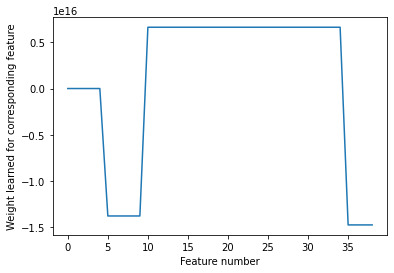

In [73]:
from matplotlib import pyplot as plt

weights = regression.coef_
plt.plot(range(len(weights)), weights)
plt.xlabel("Feature number")
plt.ylabel("Weight learned for corresponding feature")
plt.show()


The weights learned for the corresponding features seem to be based on how they are arranged from the dataframe. 

In [87]:
features_official_df.head()

,OverallQual,OverallCond,YearRemodAdd,GrLivArea,MoSold,Corner,CulDSac,FR2,FR3,Inside,...,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,IR1,IR2,IR3,Reg
0,7,5,0.883333,0.259231,2,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6,8,0.433333,0.174830,5,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,7,5,0.866667,0.273549,9,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,7,5,0.333333,0.260550,2,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8,5,0.833333,0.351168,12,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


The weights decline at **MoSold** which makes some sense since the following features: **OverallQual, OverallCond, YearRemodAdd, and GrLivArea** seem to be more substantial features for housing prices. It seems like all the **Neighborhood, LotConfig** were weighted highly while the **LotShape** seemed to have no predicting power. I wonder why **Neighborhood features and Lot Configurations** have the highest predicting power of sale price compared to the 4 earlier features shown before. 